### Code Editor
> **Chien-Wei, Chen**
>> Ver 1: 20211018, Data Overview, Data Cleaning, Data Visualization <br>
>> Ver 2: 20211021, Data enrichment, Data Visualization <br>
>> Ver 3: 20211022, Model Training and Testing<br>
>> Ver 4: 20211030, P-value, feature significancy<br> 
>> Ver 5: 20211101, Subset feature selection, data visualization<br> 
>> Ver 6: 20211103, Subset feature selection, evaluate multiple k value<br>
>> Ver 7: 20211108, Add crosstab, groupby tables<br>
>> Ver 7: 20211124, Add tree plot

### Import data processing, visualiztion libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### *Features explaination*
- Age : **age in years**
- Sex: **1 = male, 0 = female**
- cp: chest pain level, **4 types**, 
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
- trestbps: resting blood pressure **anything above 130-140 is typically cause for concern**
- chol: serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
- fbs: fasting blood sugar > 120mg/dl, **1 = true, 0 = false**
    - '>126' mg/dL signals diabetes
- restecg: Resting electrocardiography results (normal, ST-T wave abnormality, or left ventricular hypertrophy) **(values 0,1,2)**
    - 0: Nothing to note
    - 1: ST-T Wave abnormality 
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- thalach: Max. heart rate achieved during thalium stress test
- exang: Exercise induced angina **(yes = 1 or no = 0)**
- oldpeak: ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
- slope: Slope of peak exercise ST segment **(upsloping, flat, or downsloping)**
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
- ca: number of major vessels colored by flourosopy 
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
- thal: Thalium stress test result **(normal, fixed defect, or reversible defect)**
- target: **0 = no heart disease, 1 = heart disease**

### Data Overview

In [5]:
df.shape

(1025, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- As we can see from the info, there's no NaN in the df. and no object in the dtype 

In [8]:
# Check the categorical features and their unique value
catcol = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal','target']
for col in catcol:
    print(col, df[col].unique())

sex [1 0]
cp [0 1 2 3]
fbs [0 1]
restecg [1 0 2]
exang [0 1]
slope [2 0 1]
ca [2 0 1 3 4]
thal [3 2 1 0]
target [0 1]


In [9]:
illness = []
for item in df['target']:
    if item == 0:
        illness.append('No Heart Disease')
    else:
        illness.append('Heart Disease')
df['illness'] = pd.Series(illness)

In [10]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,illness
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No Heart Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No Heart Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No Heart Disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No Heart Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No Heart Disease


### Data Manipulation & Visualiztion

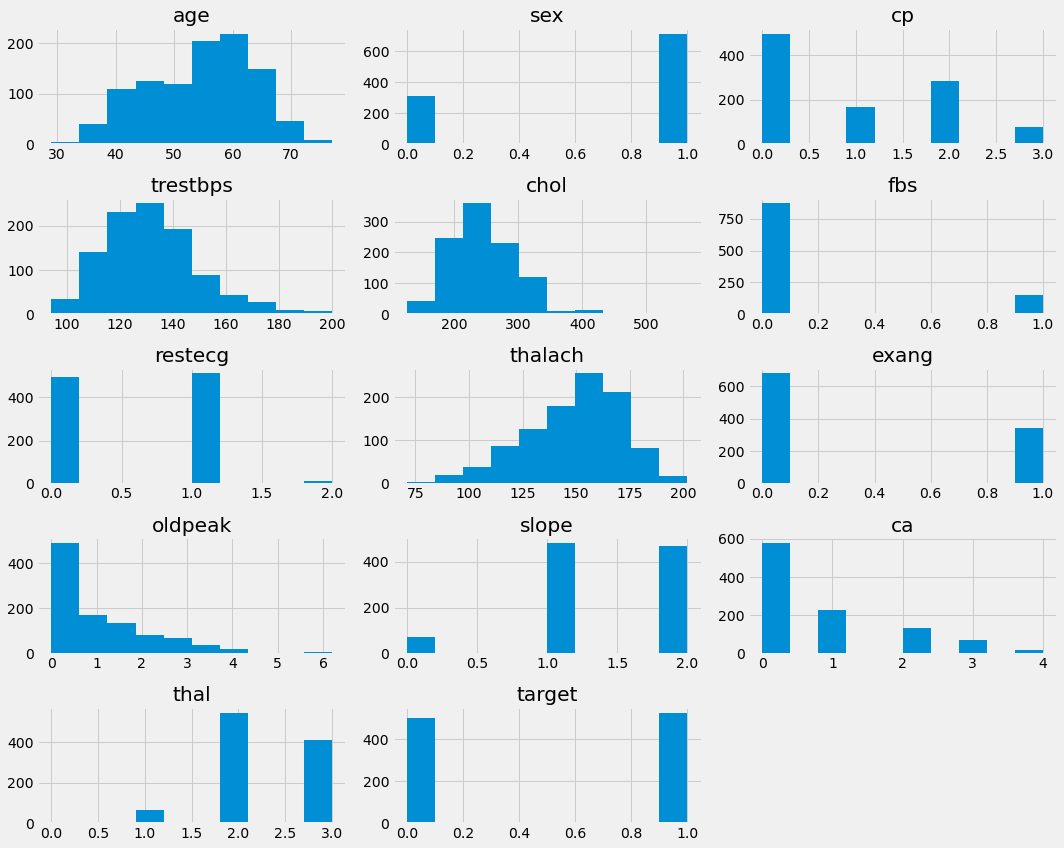

In [11]:
# Understand the distribution of each features
df.hist(figsize=(15,12),layout=(5,3))
plt.tight_layout()
plt.show()

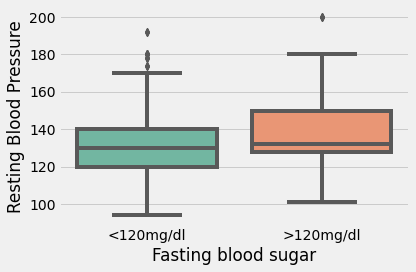

In [12]:
sns.boxplot(x='fbs',y='trestbps',data = df,palette = "Set2")
plt.ylabel('Resting Blood Pressure')
plt.xlabel('Fasting blood sugar')
plt.xticks(ticks = list(range(0,2)),labels = ['<120mg/dl','>120mg/dl'],rotation = 0)
plt.tight_layout()

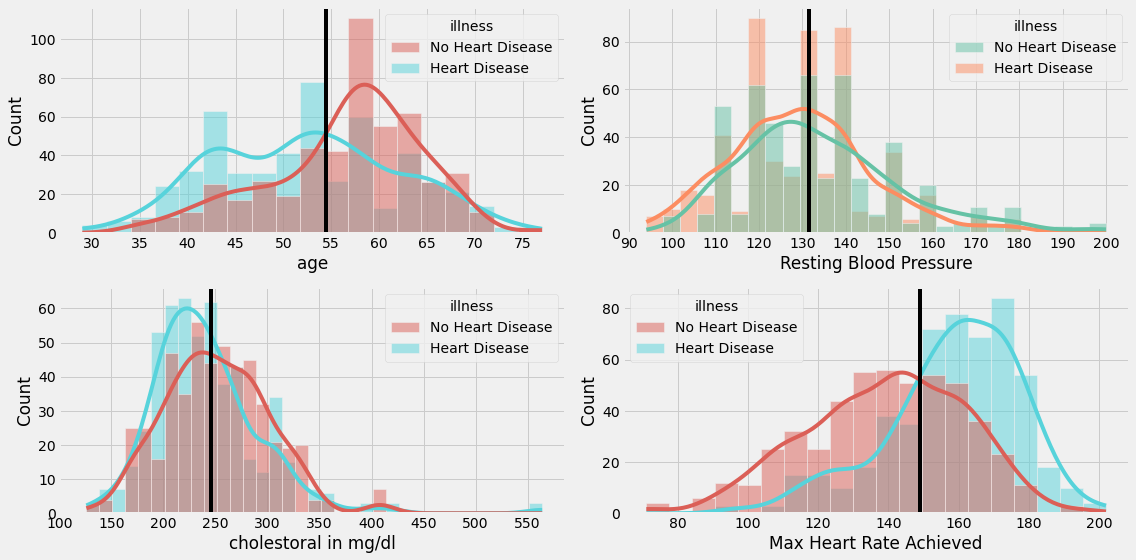

In [13]:
# Understand all continuous data

fig ,axes = plt.subplots(2,2,figsize = (16,8))

# Plot 1 : The distribution of the age and its mean
ax = sns.histplot(x = 'age', hue= 'illness' ,data = df, ax = axes[0,0], kde = True, palette = 'hls')
ax.set_xticks(list(range(30,80,5)))
ax.set_xticklabels(labels = list(range(30,80,5)))
ax.axvline(df['age'].mean(), color = 'black')

# Plot 2 : The distribution of the resting blood pressure and its mean
ax = sns.histplot(x = 'trestbps', hue= 'illness' ,data = df, ax = axes[0,1], kde = True, palette = "Set2")
ax.set_xticks(list(range(90,210,10)))
ax.set_xticklabels(labels = list(range(90,210,10)))
ax.axvline(df['trestbps'].mean(), color = 'black')
ax.set_xlabel('Resting Blood Pressure')

# Plot 3 : The distribution of the serum cholestoral and its mean
ax = sns.histplot(x = 'chol', hue= 'illness' ,data = df, ax = axes[1,0], kde = True, palette = 'hls')
ax.set_xticks(list(range(100,600,50)))
ax.set_xticklabels(labels = list(range(100,600,50)))
ax.axvline(df['chol'].mean(), color = 'black')
ax.set_xlabel('cholestoral in mg/dl')

# Plot 4 : The distribution of the maximum heart rate achieved and its mean
ax = sns.histplot(x = 'thalach',hue= 'illness' , data = df, kde = True, palette = 'hls')
ax.axvline(df['thalach'].mean(), color = 'black')
ax.set_xlabel('Max Heart Rate Achieved')

plt.tight_layout()

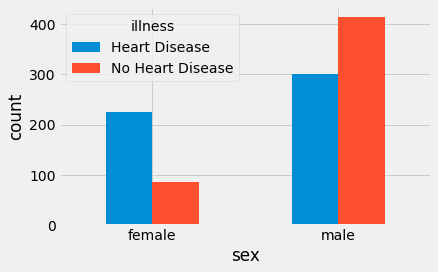

In [14]:
# Understand how many people are illed based on gender.

df1 = pd.crosstab(df['sex'],df['illness'])
df1.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,2)),labels = ['female','male'],rotation = 0)
# plt.bar(x = df.sex,height,color=['red',  'blue',])
plt.tight_layout()
plt.ylabel('count')
plt.show()

In [15]:
chestpain = pd.crosstab(df['cp'],df['illness'],margins = True)
chestpain['percentage'] = chestpain['Heart Disease']/chestpain['All']
chestpain

illness,Heart Disease,No Heart Disease,All,percentage
cp,,,,
0,122,375,497,0.245473
1,134,33,167,0.802395
2,219,65,284,0.771127
3,51,26,77,0.662338
All,526,499,1025,0.513171


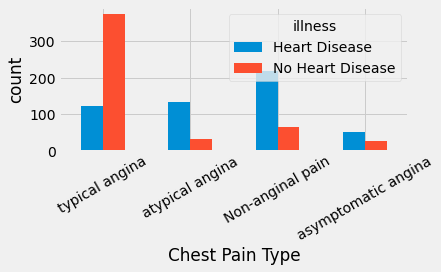

In [16]:
# Understand the relationship between chest pain types and result
df2 = pd.crosstab(df['cp'],df['illness'])
df2.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,4)),labels = ['typical angina','atypical angina','Non-anginal pain','asymptomatic angina'],
           rotation = 30)
plt.xlabel('Chest Pain Type')
plt.tight_layout()
plt.ylabel('count')
plt.show()


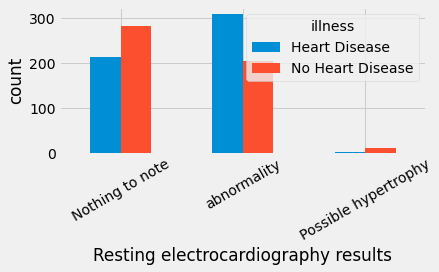

In [17]:
# Understand the relationship between Resting electrocardiography results and result
df3 = pd.crosstab(df['restecg'],df['illness'])
df3.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,3)),labels = ['Nothing to note','abnormality',
                                              'Possible hypertrophy'],rotation = 30)
plt.xlabel('Resting electrocardiography results')
plt.tight_layout()
plt.ylabel('count')
plt.show()

In [18]:
df.groupby(['restecg','illness']).count()[['target']]

target
restecg illness                 
0       Heart Disease        214
        No Heart Disease     283
1       Heart Disease        309
        No Heart Disease     204
2       Heart Disease          3
        No Heart Disease      12

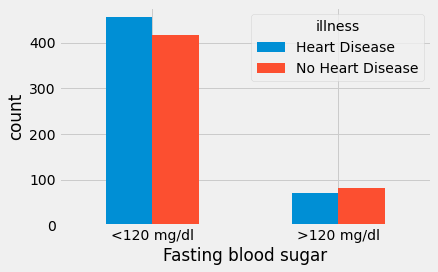

In [19]:
# Understand the fasting blood sugar(> or < 120) and result
df4 = pd.crosstab(df['fbs'],df['illness'])
df4.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,2)),labels = ['<120 mg/dl','>120 mg/dl'],rotation = 0)
plt.xlabel('Fasting blood sugar')
plt.tight_layout()
plt.ylabel('count')
plt.show()

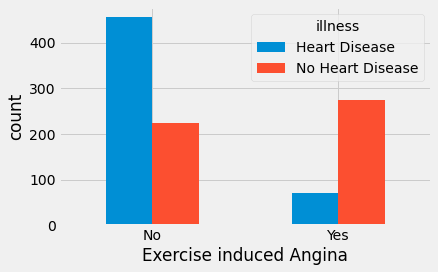

In [20]:
# Understand the relationship between Exercise induced Angina and result
df5 = pd.crosstab(df['exang'],df['illness'])
df5.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,2)),labels = ['No','Yes'],rotation = 0)
plt.xlabel('Exercise induced Angina')
plt.tight_layout()
plt.ylabel('count')
plt.show()

In [21]:
pd.crosstab(df['exang'],df['illness'],margins = True)

illness,Heart Disease,No Heart Disease,All
exang,,,
0,455,225,680
1,71,274,345
All,526,499,1025


In [22]:
pd.crosstab(df['sex'],df['illness'],margins = True)

illness,Heart Disease,No Heart Disease,All
sex,,,
0,226,86,312
1,300,413,713
All,526,499,1025


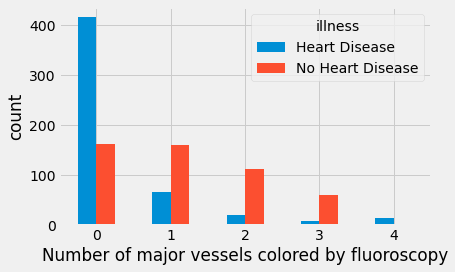

In [23]:
# Understand the relationship between number of major vessels colored by flouroscopy and result
df6 = pd.crosstab(df['ca'],df['illness'])
df6.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,5)),rotation = 0)
plt.xlabel('Number of major vessels colored by fluoroscopy')
plt.tight_layout()
plt.ylabel('count')
plt.show()

# The more the better, which means no clots detected

In [24]:
vesselcolored = pd.crosstab(df['ca'],df['illness'],margins = True)
vesselcolored['percentage'] = vesselcolored['Heart Disease']/vesselcolored['All']
vesselcolored

illness,Heart Disease,No Heart Disease,All,percentage
ca,,,,
0,415,163,578,0.717993
1,66,160,226,0.292035
2,21,113,134,0.156716
3,9,60,69,0.130435
4,15,3,18,0.833333
All,526,499,1025,0.513171


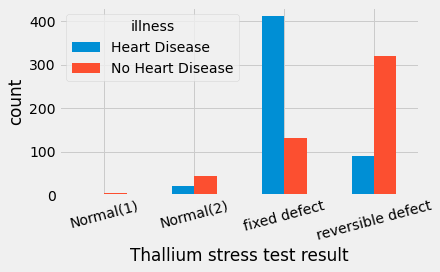

In [25]:
# Understand the Thalium stress test and heart disease
df7 = pd.crosstab(df['thal'],df['illness'])
df7.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,4)),labels = ['Normal(1)','Normal(2)','fixed defect','reversible defect'],rotation =15)
plt.xlabel('Thallium stress test result')
plt.tight_layout()
plt.ylabel('count')
plt.show()

# 0, 1 are normal
# 2 fixed defect
# 3 reversible defect

In [26]:
df.groupby(['thal','illness']).count()['target']

thal  illness         
0     Heart Disease         3
      No Heart Disease      4
1     Heart Disease        21
      No Heart Disease     43
2     Heart Disease       412
      No Heart Disease    132
3     Heart Disease        90
      No Heart Disease    320
Name: target, dtype: int64

Text(0, 0.5, 'ST Depression induced by Exercise')

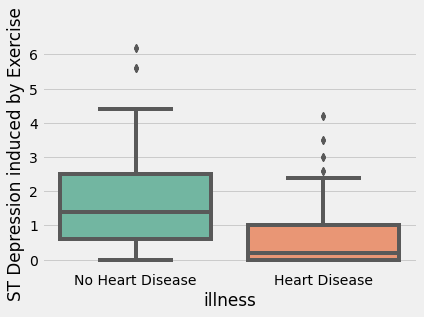

In [27]:
sns.boxplot(x = 'illness', y = 'oldpeak', data = df, palette = "Set2")
plt.ylabel('ST Depression induced by Exercise')

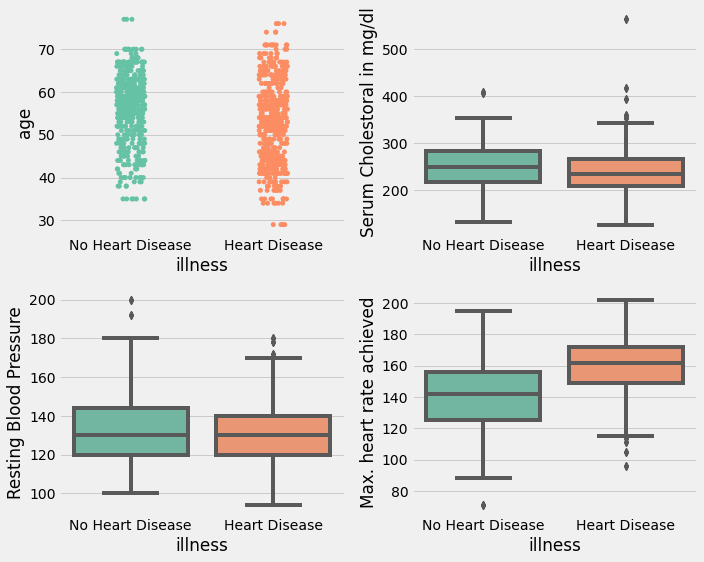

In [28]:
fig ,axes = plt.subplots(2,2,figsize = (10,8))

# Plot 1 : Understand the relationship between sex and age, and how does that impact the result 
ax = sns.stripplot(x ='illness', y = 'age',data = df, ax = axes[0,0],palette = "Set2")

# Plot 2 : Understand if chol level impact the result based on different sex
ax = sns.boxplot(x = 'illness', y = 'chol',data = df, ax = axes[0,1],palette = "Set2")
ax.set_ylabel('Serum Cholestoral in mg/dl')

# Plot 3 : Understand if blood pressure impact the result based on different sex
ax = sns.boxplot(x = 'illness', y = 'trestbps', data = df, ax = axes[1,0],palette = "Set2")
ax.set_ylabel('Resting Blood Pressure')

# Plot 4 : Understand if maximum heart rate level would impact the result based on different sex
ax = sns.boxplot(x = 'illness', y = 'thalach', data = df, ax = axes[1,1],palette = "Set2")
ax.set_ylabel('Max. heart rate achieved')

plt.tight_layout()
# plt.savefig('Continuous variables V.S Heart Disease.png')



In [29]:
# Understanding the relationship between chol level and blood pressure
print(df['trestbps'].max())
print(df['trestbps'].min())

200
94


In [30]:
# Binning for blood pressure category
bins = [80, 120, 129, 139, 179, float('inf')]
HBPL = ['Normal','Elevated','HBP(Stage 1)','HBP(Stage 2)','Hypertensive Crisis']
df['BPL'] = pd.cut(df['trestbps'], bins = bins, labels = HBPL)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,illness,BPL
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No Heart Disease,Elevated
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No Heart Disease,HBP(Stage 2)
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No Heart Disease,HBP(Stage 2)
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No Heart Disease,HBP(Stage 2)
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No Heart Disease,HBP(Stage 1)


In [31]:
pd.crosstab(df['BPL'],df['illness'],margins = True)

illness,Heart Disease,No Heart Disease,All
BPL,,,
Normal,191,138,329
Elevated,54,74,128
HBP(Stage 1),144,100,244
HBP(Stage 2),134,173,307
Hypertensive Crisis,3,14,17
All,526,499,1025


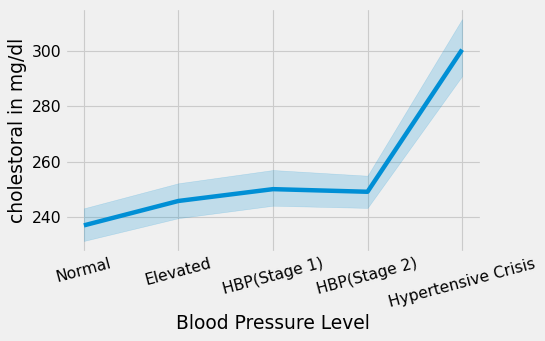

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(7, 4), dpi=80) 
sns.lineplot(x = 'BPL', y = 'chol', data = df,palette = "Set2")
plt.tight_layout()
plt.xticks(rotation =15)
plt.xlabel('Blood Pressure Level')
plt.ylabel('cholestoral in mg/dl')
plt.show()

# So, high chol does lead to higher blood pressure.

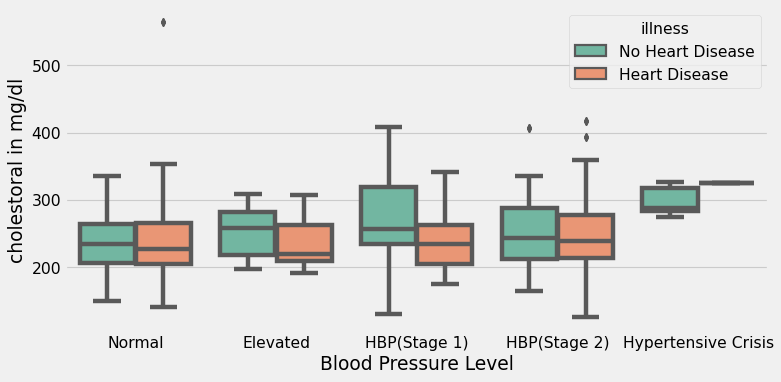

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=80) 
sns.boxplot(x = 'BPL', y = 'chol',hue = 'illness', data = df, palette = "Set2")
plt.xticks(ticks = list(range(0,5)),labels =  ['Normal','Elevated','HBP(Stage 1)','HBP(Stage 2)',
                                               'Hypertensive Crisis'],rotation = 0)
plt.xlabel('Blood Pressure Level')
plt.ylabel('cholestoral in mg/dl')
plt.tight_layout()
plt.show()

# but high chol level and high blood pressure do not have clear signal on having heart disease or not
# HBP stands for High Blood Pressure

In [34]:
# Understand how ST segement slope influences the result
"""
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart"""

slopecat = []
for item in df['slope']:
    if item == 0:
        slopecat.append('Upsloping')
    elif item == 1:
        slopecat.append('Flatsloping')
    else:
        slopecat.append('Downsloping')
df['slopecat'] = pd.Series(slopecat)

In [35]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,illness,BPL,slopecat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No Heart Disease,Elevated,Downsloping
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No Heart Disease,HBP(Stage 2),Upsloping
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No Heart Disease,HBP(Stage 2),Upsloping


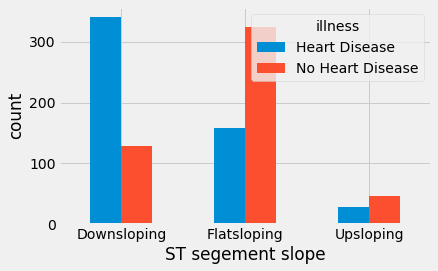

In [36]:
df8 = pd.crosstab(df['slopecat'],df['illness'])
df8.plot(kind = 'bar')
plt.xticks(ticks = list(range(0,3)),labels =  ['Downsloping','Flatsloping','Upsloping'],rotation = 0)
plt.xlabel('ST segement slope')
plt.tight_layout()
plt.ylabel('count')
plt.show()

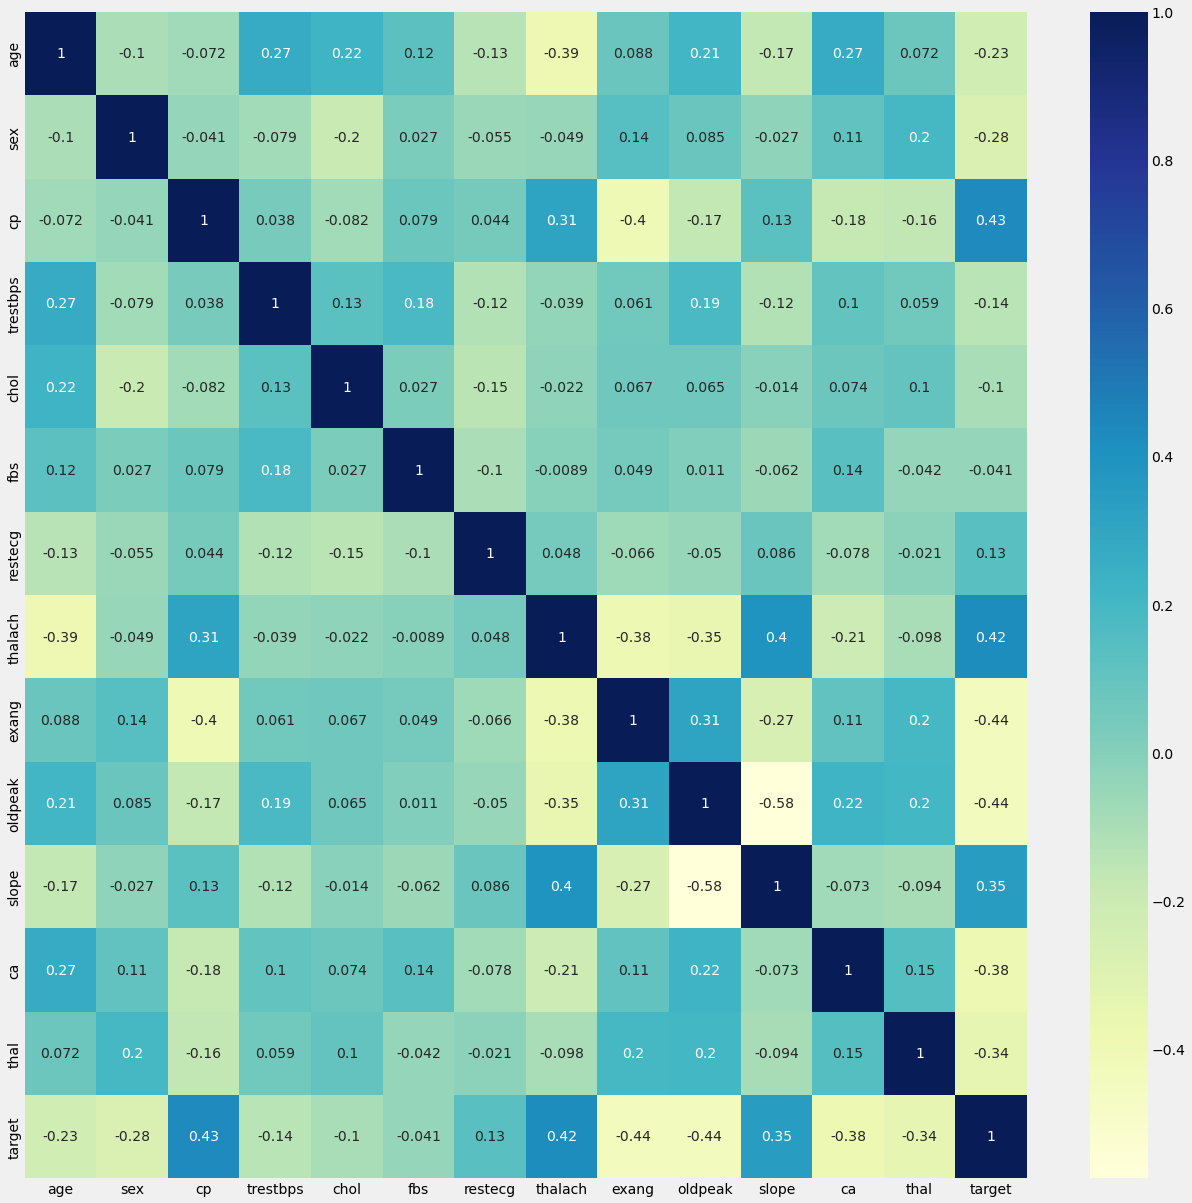

In [37]:
# See correlation
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
corr_heatmap = sns.heatmap(df[top_corr_features].corr(), annot = True , cmap = "YlGnBu")

### Machine Learning Model

In [38]:
# Import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [39]:
# load the dataset for machine learning
df = pd.read_csv('heart.csv')
X = df.drop(columns = ['target'])
y = df['target']
# Split the data into training & testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

- Feature Selection (subset, mutual info, k = 4~8)

In [40]:
for i in np.arange(4,9):
    
    select = SelectKBest(score_func = mutual_info_classif, k=i)
    selected = select.fit(X, y)

    features = X.columns
    filtering = select.get_support()
    print(features[filtering])

Index(['chol', 'thalach', 'oldpeak', 'thal'], dtype='object')
Index(['cp', 'chol', 'thalach', 'ca', 'thal'], dtype='object')
Index(['cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')
Index(['cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')
Index(['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [41]:
X_selected4 = df[['cp', 'chol', 'thalach', 'oldpeak']]
y_selected4 = df['target']

X_selected5 = df[['cp', 'chol', 'thalach', 'oldpeak', 'thal']]
y_selected5 = df['target']

X_selected6 = df[['cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']]
y_selected6 = df['target']

X_selected7 = df[['cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
y_selected7 = df['target']

X_selected8 = df[['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
y_selected8 = df['target']

X_train4, X_test4, y_train4 , y_test4 = train_test_split(X_selected4, y_selected4, test_size=0.25, random_state = 3)
X_train5, X_test5, y_train5 , y_test5 = train_test_split(X_selected5, y_selected5, test_size=0.25, random_state = 3)    
X_train6, X_test6, y_train6 , y_test6 = train_test_split(X_selected6, y_selected6, test_size=0.25, random_state = 3)
X_train7, X_test7, y_train7 , y_test7 = train_test_split(X_selected7, y_selected7, test_size=0.25, random_state = 3)
X_train8, X_test8, y_train8 , y_test8 = train_test_split(X_selected8, y_selected8, test_size=0.25, random_state = 3)

In [42]:
def models(X_train, y_train, X_test, y_test):

    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_predLogreg = logreg.predict(X_test)
    scoreLR = accuracy_score(y_test,y_predLogreg)
    
    tree= DecisionTreeClassifier(criterion='entropy',random_state = 0)
    tree.fit(X_train, y_train)
    y_predDT = tree.predict(X_test)
    scoreDT = accuracy_score(y_test,y_predDT)
    
    svm = SVC()
    svm.fit(X_train,y_train)
    y_predSVM = svm.predict(X_test)
    scoreSVM = accuracy_score(y_test,y_predSVM)
    
    return scoreLR, scoreDT, scoreSVM

In [59]:
print(models(X_train4, y_train4, X_test4, y_test4))
print(models(X_train5, y_train5, X_test5, y_test5))
print(models(X_train6, y_train6, X_test6, y_test6))
print(models(X_train7, y_train7, X_test7, y_test7))
print(models(X_train8, y_train8, X_test8, y_test8))

(0.7315175097276264, 0.9883268482490273, 0.6964980544747081)
(0.7704280155642024, 0.9883268482490273, 0.6926070038910506)
(0.8132295719844358, 1.0, 0.6964980544747081)
(0.8249027237354085, 1.0, 0.6964980544747081)
(0.8287937743190662, 0.9883268482490273, 0.7198443579766537)


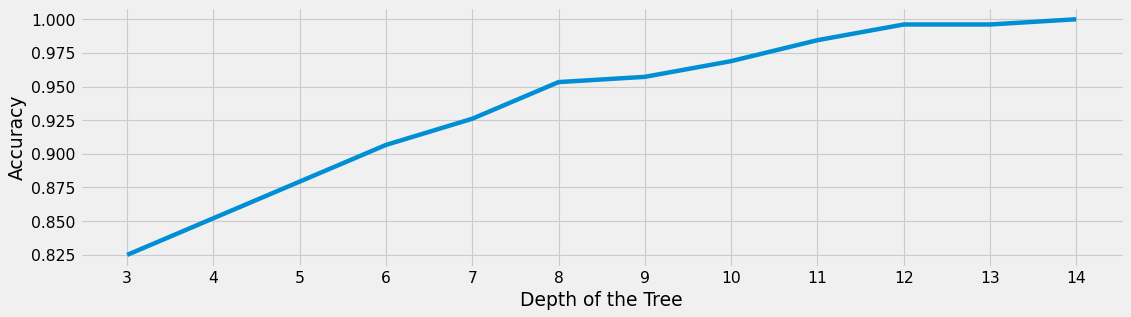

In [82]:
# Find the optimal depth of decision tree in order not to overfit yet still give us rather good accuracy
i_range = range(3,15)
scorelist = []
for i in i_range:
    clf = DecisionTreeClassifier(criterion='entropy',random_state = 0, max_depth = i)
    clf.fit(X_train6, y_train6)
    dtc_y_pred = clf.predict(X_test6)
    score = accuracy_score(y_test6, dtc_y_pred)
    scorelist.append(score)
scorelist = pd.Series(scorelist)

figure(figsize=(15, 4), dpi=80)
plt.plot(i_range,scorelist)
plt.xticks(i_range)
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy')
plt.show()    

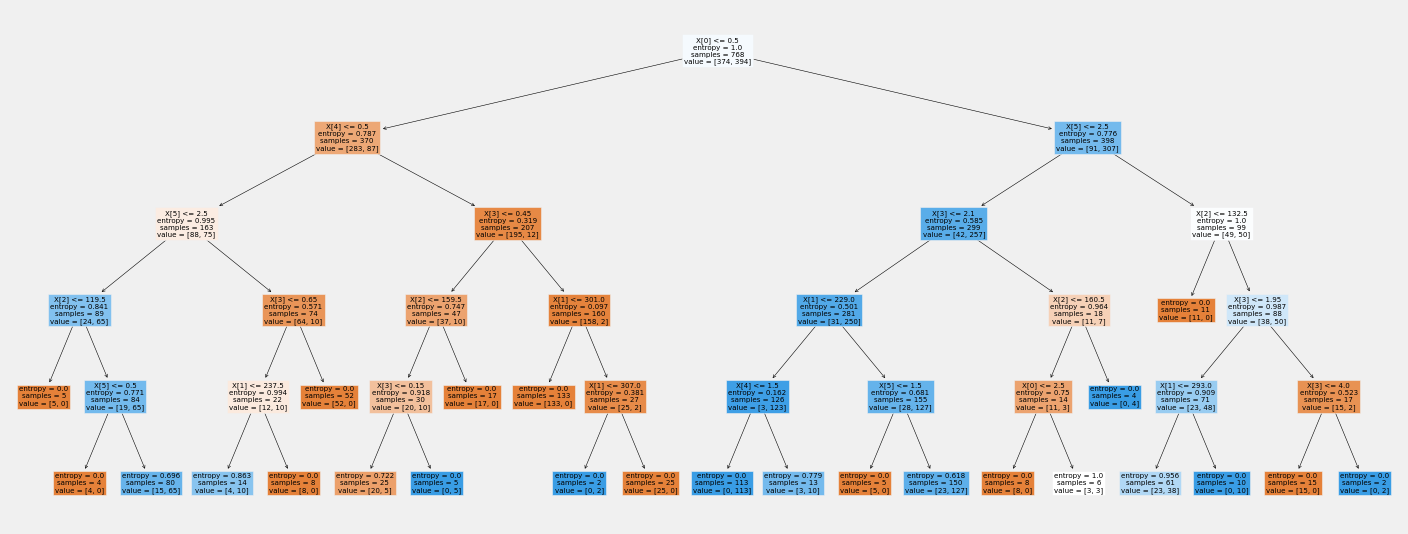

The number of terminal nodes:  24


In [65]:
from sklearn import tree
from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=80) 

clf = DecisionTreeClassifier(criterion='entropy',random_state = 0, max_depth = 5)
selected6tree = clf.fit(X_train6, y_train6)
tree.plot_tree(selected6tree,filled = True)
plt.show()

print('The number of terminal nodes: ',clf.get_n_leaves())

- Feature selection by P-value

In [47]:
# See significace of every predictors (Multiple logistic regression) 

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Check every predictors
PredSignificance = sm.add_constant(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])
y = df['target']
est = sm.Logit(y, PredSignificance).fit()
print(est.summary())

print('Age & fbs are not significant')

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Wed, 24 Nov 2021   Pseudo R-squ.:                  0.4938
Time:                        14:06:30   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.

In [48]:
df = pd.read_csv('heart.csv')
X_selectedP = df.drop(columns=['age','fbs','target'])
y_selectedP = df['target']

X_trainP, X_testP, y_trainP , y_testP = train_test_split(X_selectedP, y_selectedP, test_size=0.25, random_state = 3)
X_trainP.shape

(768, 11)

In [49]:
models(X_trainP, y_trainP, X_testP, y_testP)

(0.8365758754863813, 1.0, 0.7159533073929961)

### Model selection

In [66]:
# Use cross validation to test the model, with KFOLD

def Cross_val_models(X, y):
    
    """A function that runs through several models, using k_fold, and we get the average score of each
    model"""
    
    cv = KFold(n_splits=10)
    
    cross_val_scoreLR = []
    logreg = LogisticRegression()
    scoresLR = cross_val_score(logreg, X, y, cv = cv, scoring = 'accuracy')
    cross_val_scoreLR.append(scoresLR.mean())
      
    cross_val_scoreDT = []
    tree = DecisionTreeClassifier(criterion='entropy',random_state = 0, max_depth = 5)
    scoresDT = cross_val_score(tree, X, y, cv = cv, scoring = 'accuracy')
    cross_val_scoreDT.append(scoresDT.mean())
    
    cross_val_scoreSVM = []
    svm = SVC()
    scoresSVM = cross_val_score(svm, X, y, cv = cv, scoring = 'accuracy')
    cross_val_scoreSVM.append(scoresSVM.mean())
       
    return cross_val_scoreLR, cross_val_scoreDT, cross_val_scoreSVM

In [75]:
# Feature selection - Subset used
print(Cross_val_models(X_selected6, y_selected6))

# Feature selection - p-value (predictors significance)
print(Cross_val_models(X_selectedP, y_selectedP))

([0.8281743765467352], [0.879040548258138], [0.6974205216067009])
([0.848676946506758], [0.8828478964401294], [0.7071958880639635])


The accuracies of DecisionTree model with different numbers of feature selected are quite similiar. We pick X_selected6, since it contains only 6 predictors

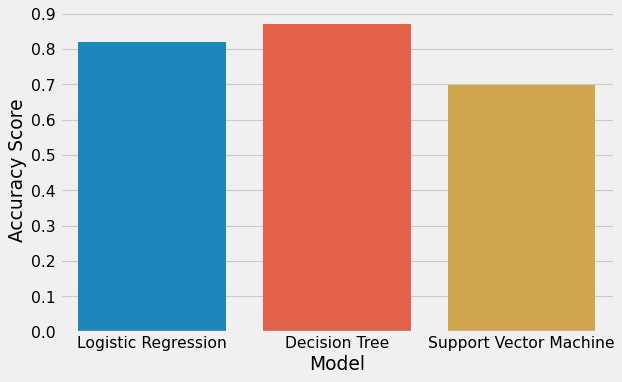

In [81]:
# Plot the accuracy of all models with 6 features selected
modelname = pd.Series(['Logistic Regression', 'Decision Tree', 'Support Vector Machine'])
modelscore = pd.Series([0.82, 0.87, 0.6974])

from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80) 
sns.barplot(modelname, modelscore)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0,1,0.1))
plt.tight_layout()
plt.show()